# VASP Xdatcar

In order to use ``kinisi`` for the analysis of a VASP Xdatcar file, the ``DiffAnalyzer`` class should be used.

In [2]:
from kinisi.analyze import DiffAnalyzer

There the ``params`` dictionary describes details about the simulation, and matches the options in the [pymatgen.analysis.diffusion_analyzer.DiffusionAnalyzer](https://pymatgen.org/pymatgen.analysis.diffusion_analyzer.html) class.

In [3]:
params = {'specie': 'Li',
          'time_step': 2.0,
          'step_skip': 50,
          'temperature': 400,
          'min_obs': 50}

In [4]:
diff = DiffAnalyzer('example_XDATCAR.gz', params)

100%|██████████| 1000/1000 [01:20<00:00, 12.35it/s]


The ``DiffAnalyzer`` will perform the block-bootstrapping process to obtain the displacements and uncertainties, before using Markov chain Monte Carlo to sample the diffusion coefficient, $D$ (this method is discussed in detail in the [uravu documentation](https://uravu.readthedocs.io/en/latest/mcmc.html)). 
It is possible to then probe the ``relationship`` of the diffusion, of the `D` object itself (which is an [``uravu.distribution.Distribution``](https://uravu.readthedocs.io/en/latest/distribution.html#uravu.distribution.Distribution)).

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
diff.relationship.y_n

array([0.89930556, 0.94623261, 0.9894586 , 1.02858456, 1.07165334,
       1.11332814, 1.15893374, 1.19898169, 1.23300419, 1.27192455,
       1.30444665, 1.34588607, 1.38950774, 1.42968651, 1.46778584,
       1.50778166, 1.54354493, 1.57823335, 1.61530425, 1.65680644,
       1.69486715, 1.73750321, 1.77902242, 1.82078229, 1.8587294 ,
       1.90310321, 1.93976175, 1.98238998, 2.0337358 , 2.06932787,
       2.10801277, 2.14659613, 2.18200787, 2.23173459, 2.26205642,
       2.32281638, 2.35807328, 2.4045039 , 2.44851524, 2.50766645,
       2.53559886, 2.57093014, 2.61351698, 2.65163797, 2.69896598,
       2.74838738, 2.76993517, 2.81225788, 2.84865252, 2.88126067,
       2.91967145, 2.95682391, 2.98637473, 3.0430218 , 3.06785259,
       3.12259269, 3.15029883, 3.18314621, 3.21584354, 3.27345794,
       3.30110644, 3.31360829, 3.33903667, 3.37145931, 3.42374631,
       3.47482992, 3.50440241, 3.53755282, 3.57175454, 3.60495696,
       3.64185649, 3.68809441, 3.70684809, 3.78937263, 3.81172

In [40]:
plt.plot(diff.relationship.x_n, diff.relationship.y_n)
plt.show()

FileNotFoundError: missing font metrics file: cmr12

<Figure size 432x288 with 1 Axes>

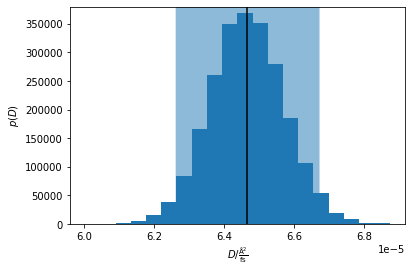

In [34]:
plt.hist(diff.D.samples, density=True, bins=20)
plt.axvline(diff.D.mean.n, c='k')
plt.fill_betweenx(range(400000), *diff.D.con_int, alpha=0.5)
plt.ylim(0, 380000)
plt.xlabel('$D$/${:~L}$'.format(diff.D.unit))
plt.ylabel('$p(D)$')
plt.show()